In [14]:
import numpy as np
import pandas as pd

from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.2)

%matplotlib inline

## Reading the data

In [8]:
recipies = pd.read_csv('F:\Py_lib\Cupcake vs Muffin.csv')
df = pd.DataFrame(recipies)

In [9]:
df.head()

,Type,Flour,Sugar,Milk,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,3,28,7,5,2,0,0
1,Muffin,47,12,24,6,9,1,0,0
2,Muffin,47,18,23,6,4,1,0,0
3,Muffin,45,17,11,17,8,1,0,0
4,Muffin,50,12,25,6,5,2,1,0


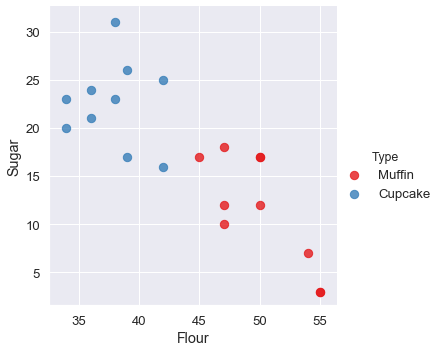

In [12]:
# plotting the data
sns.lmplot('Flour','Sugar',data = df, hue = 'Type',
          palette = 'Set1', fit_reg = False, scatter_kws = {"s":70})#kws for size

## Preprocessing the data

In [24]:
#classifying muffins as 1 and cupcakes 0
type_label = np.where(df['Type'] == 'Muffin', 0, 1)
features = df.columns.values[1:].tolist()
ingredients = df[['Flour','Sugar']].values
ingredients

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]], dtype=int64)

## Training Model using SVM

In [27]:
model = svm.SVC(kernel = 'linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Plotting the hyperplane

In [31]:
# getting separating hyperplane
w = model.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0])/w[1]

# plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a*b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

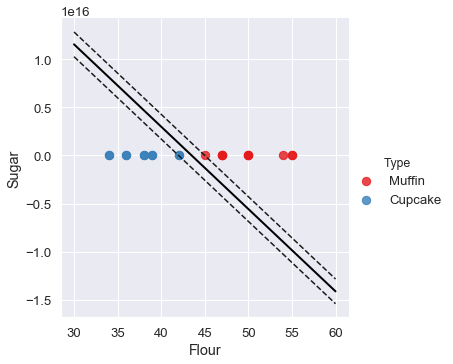

In [38]:
sns.lmplot('Flour','Sugar',data = df, hue = 'Type',
          palette = 'Set1', fit_reg = False, scatter_kws = {"s":70})
plt.plot(xx, yy, lw = 2, color = 'black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

## Verifying Model

In [45]:
# function to prdict muffin or cupcake
def muffin_or_cupcake(flour,sugar):
    if(model.predict([[flour,sugar]])) == 0:
        print('You\'re looking at a muffin recipie')
    else:
        print('You\'re looking at a cupcake recipie')
 
# test data
muffin_or_cupcake(50,20)

You're looking at a muffin recipie


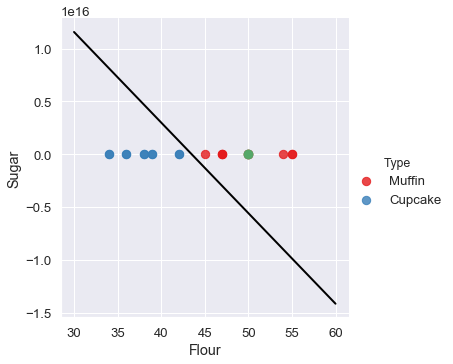

In [51]:
# PLotting it on graph
sns.lmplot('Flour','Sugar',data = df, hue = 'Type',
          palette = 'Set1', fit_reg = False, scatter_kws = {"s":70})
plt.plot(xx, yy, lw = 2, color = 'black')
plt.plot(50,20,'go',markersize = '9')